<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Тренд" data-toc-modified-id="Тренд-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Тренд</a></span></li><li><span><a href="#Сезонность" data-toc-modified-id="Сезонность-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сезонность</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Разделение-на-обучающую,-валидационную-и-тестовую-выборки" data-toc-modified-id="Разделение-на-обучающую,-валидационную-и-тестовую-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разделение на обучающую, валидационную и тестовую выборки</a></span></li><li><span><a href="#Prophet" data-toc-modified-id="Prophet-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Prophet</a></span></li><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Создание признаков</a></span></li><li><span><a href="#Модели:" data-toc-modified-id="Модели:-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модели:</a></span><ul class="toc-item"><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
!pip install Prophet

     |████████████████████████████████| 14.4 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 913 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 1.6 MB/s  eta 0:00:01
  Attempting uninstall: holidays
    Found existing installation: holidays 0.11.3.1
    Uninstalling holidays-0.11.3.1:
      Successfully uninstalled holidays-0.11.3.1


In [2]:
!pip install catboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

#from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import time

Загрузим данные, преобразуем данные столбца с датой в тип DateTime пареметром `parse_dates` и установим индекс таблицы равным столбцу datetime.

In [4]:
df = pd.read_csv('/datasets/taxi.csv',
                 parse_dates=['datetime'],
                 index_col=['datetime'])

Посмотрим на данные, выведем первые и последие 10 сток набора данных

In [5]:
df.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


In [6]:
df.tail(10)

,num_orders
datetime,
2018-08-31 22:20:00,48
2018-08-31 22:30:00,41
2018-08-31 22:40:00,34
2018-08-31 22:50:00,34
2018-08-31 23:00:00,30
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27
2018-08-31 23:40:00,39


Проверим, в хронологическом порядке расположены даты и время или нет, используем атрибут индекса таблицы `is_monotonic`.

In [7]:
df.index.is_monotonic

True

Данные расположены в хронологическом порядке. 

### Вывод:
1. Загрузили данные;
2. Преобразовали данные столбца datetime в тип данных DateTime;
3. Установили индекс набора данных равным столбцу datetime;
4. Проверили, данные расположены в хронологическом порядке. 

Набор данных содержит информацию о количестве заказов такси за пол года `с 1 марта 2018 года по 31 августа 2018 года`. <br> Всего - `26 496` записей.

Перейдем к анализу данных.

## Анализ

Посмотрим информацию о наборе данных методами `info` и `describe`

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [9]:
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


Посмортим график нашего ряда

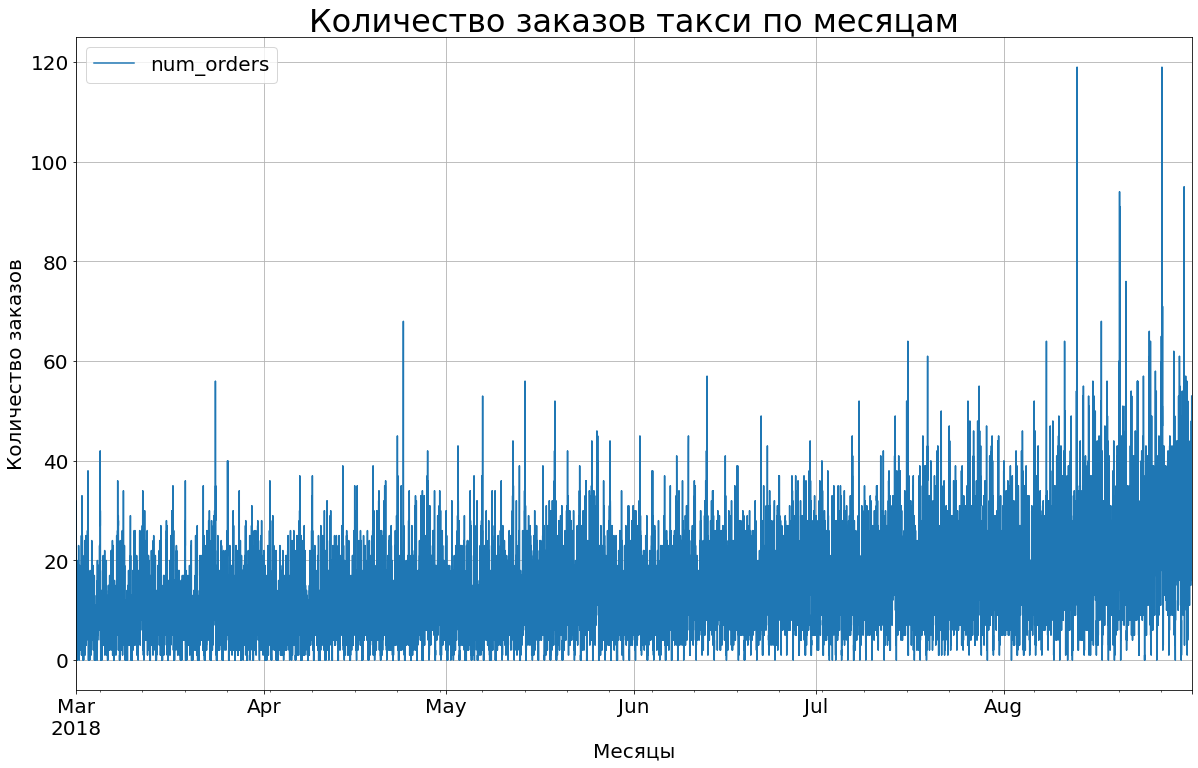

In [10]:
ax = df.plot(figsize=(20,12),
        grid=True,
        fontsize=20);
ax.legend(fontsize=20)
ax.set_xlabel('Месяцы', fontsize = 20)
ax.set_ylabel('Количество заказов', fontsize = 20)
plt.title('Количество заказов такси по месяцам', fontsize = 32);

Из графика видно, что наш ряд имеет небольшое кол-во выбросов, которые влияют на разброс. Так как нам нужно спрогнозировать количество заказов такси на следующий час, поэтому есть смысл перейти к `часовому интервалу и среднему значению закказа такси на нем`, это избавит нас от выбросов и уменьшит колебания нашего ряда.<br>
Используем  функцию `resample()`.

In [11]:
df = df.resample('h').sum()

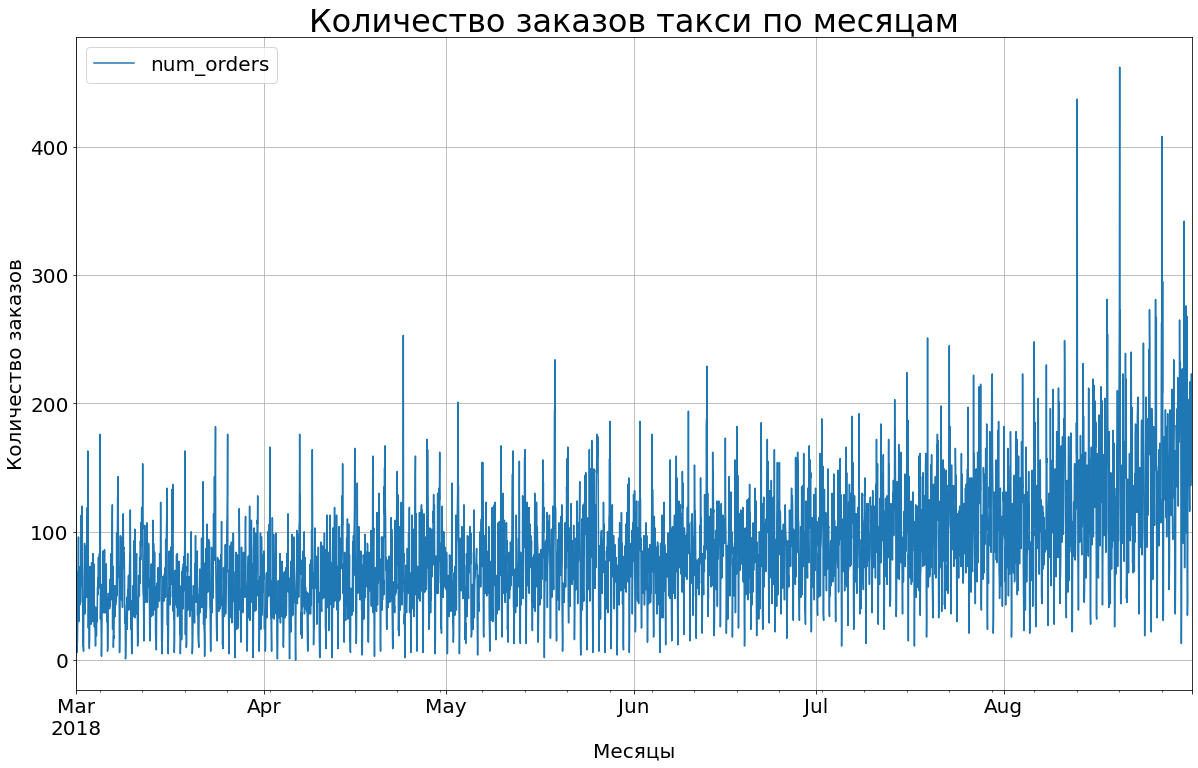

In [12]:
ax = df.plot(figsize=(20,12),
        grid=True,
        fontsize=20)
ax.legend(fontsize=20)
ax.set_xlabel('Месяцы', fontsize = 20)
ax.set_ylabel('Количество заказов', fontsize = 20)
plt.title('Количество заказов такси по месяцам', fontsize = 32);

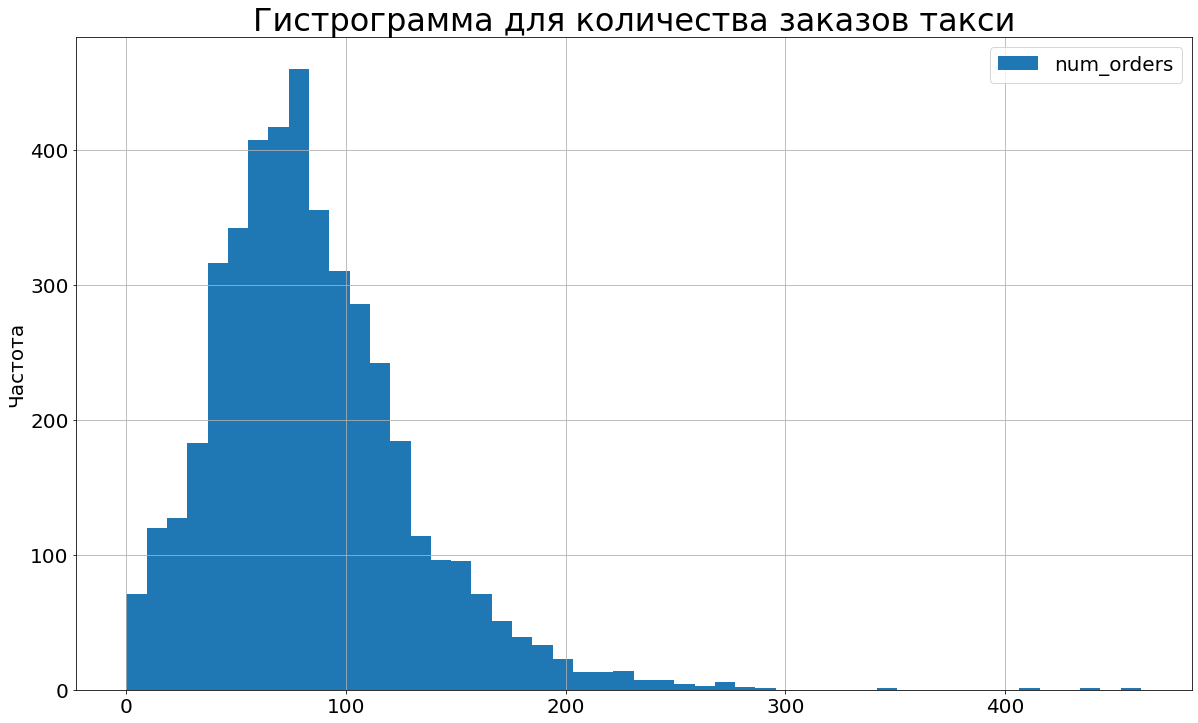

In [13]:
ax = df.plot(kind='hist',
        figsize=(20,12),
        grid=True,
        bins=50,
        fontsize=20);


ax.legend(fontsize=20)
ax.set_ylabel('Частота', fontsize = 20)
plt.title('Гистрограмма для количества заказов такси', fontsize = 32);

Гистограмма принимает форму нормального распределения (распределения Гаусса) со сдвигом вправо.

Посмотрим на тренд и сезонность временного ряда.

In [14]:
decomposed = seasonal_decompose(df)

### Тренд

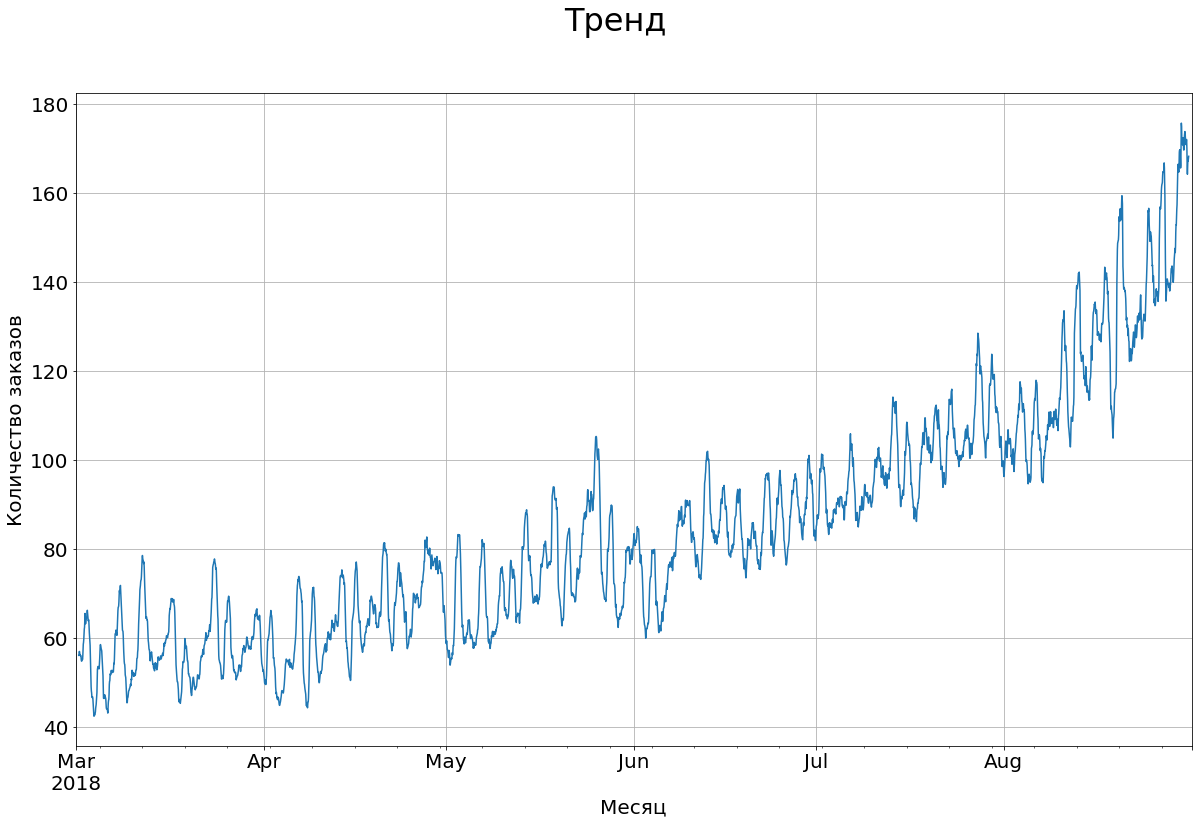

In [15]:
decomposed.trend.plot(ax=plt.gca(),
                      figsize=(20,12),
                      fontsize=20)
plt.grid()
plt.suptitle('Тренд', fontsize=32)
plt.xlabel('Месяц', fontsize=20)
plt.ylabel('Количество заказов', fontsize=20);

На графике видим тренд на увеличение заказов такси. Временной ряд нестационарный, потому что у него меняется среднее значение.

### Сезонность

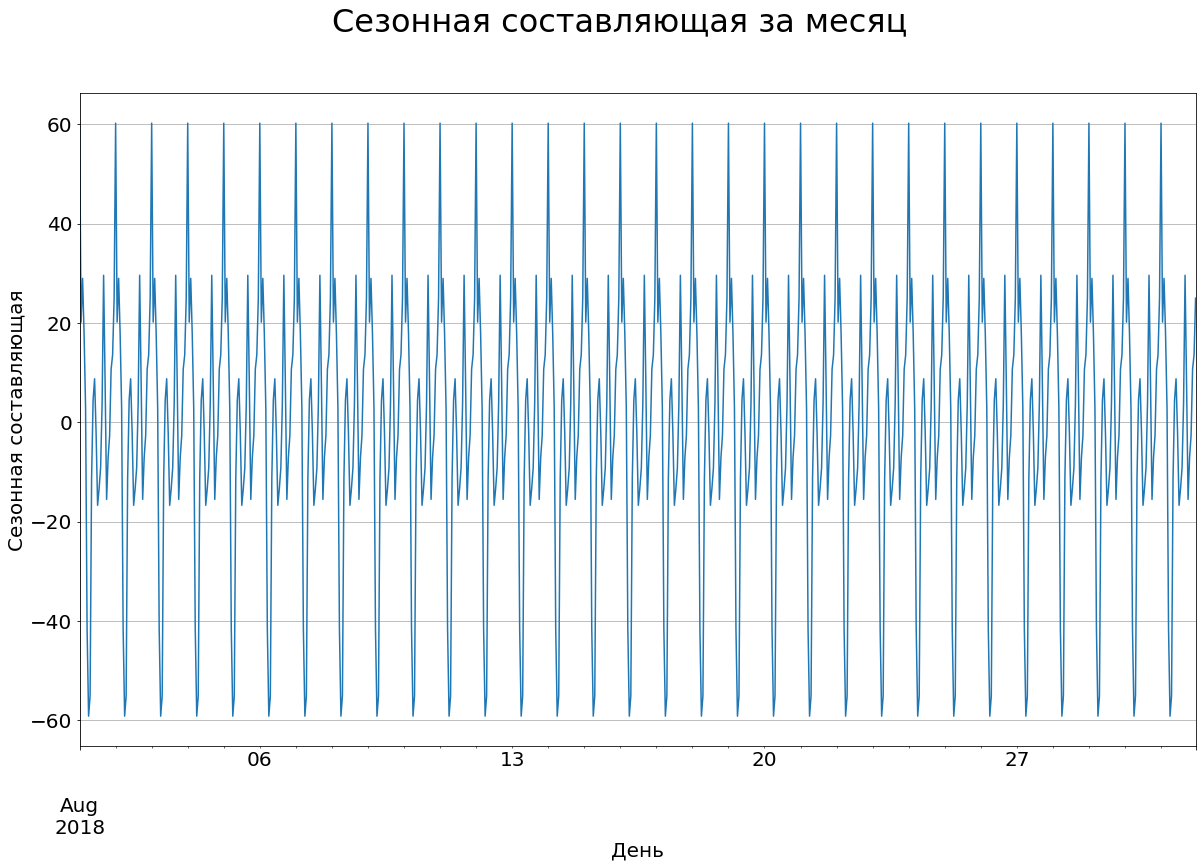

In [16]:
decomposed.seasonal['2018-08-01':'2018-08-31'].plot(ax=plt.gca(),
                                                   figsize=(20,12),
                                                   grid=True,
                                                   fontsize=20)

plt.suptitle('Сезонная составляющая за месяц', fontsize=32)
plt.xlabel('День', fontsize=20)
plt.ylabel('Сезонная составляющая', fontsize=20);

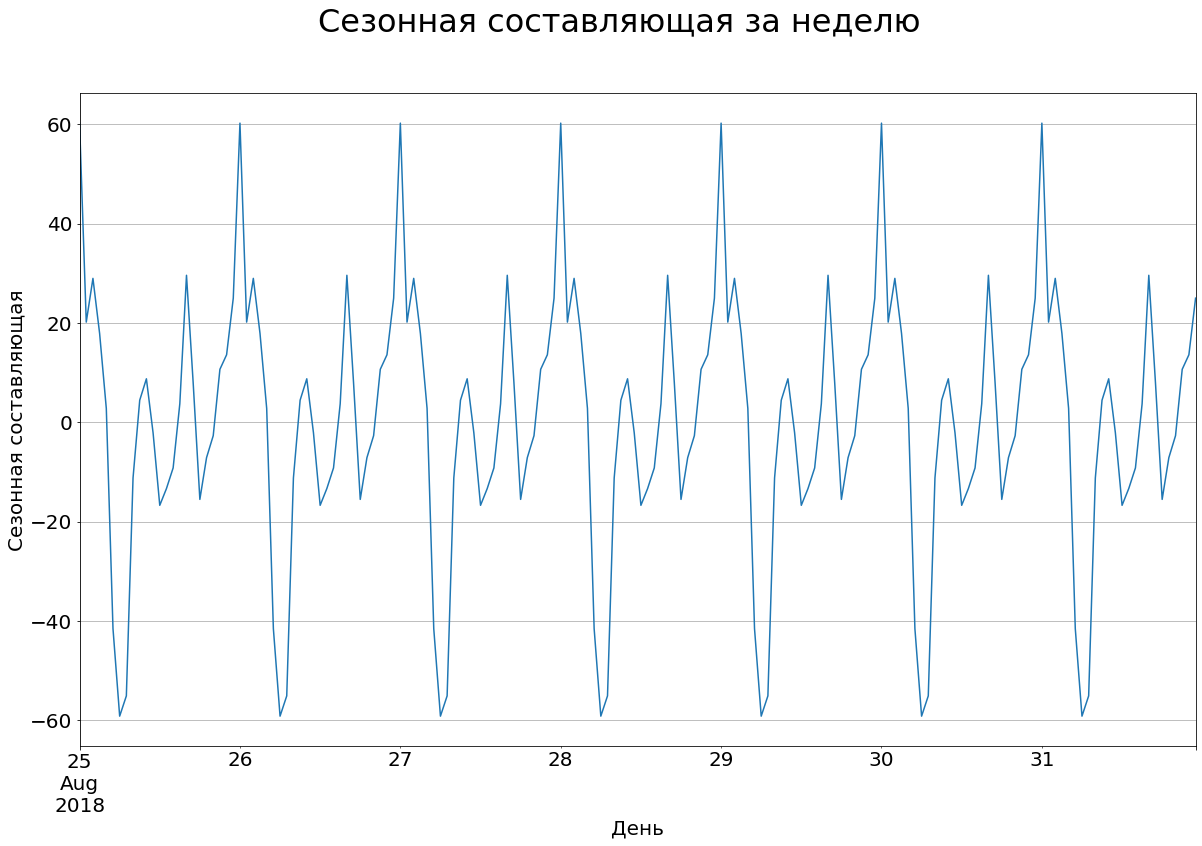

In [17]:
decomposed.seasonal['2018-08-25':'2018-08-31'].plot(ax=plt.gca(),
                                                   figsize=(20,12),
                                                   grid=True,
                                                   fontsize=20)

plt.suptitle('Сезонная составляющая за неделю', fontsize=32)
plt.xlabel('День', fontsize=20)
plt.ylabel('Сезонная составляющая', fontsize=20);

На сезонном графике за месяц и за неделю видно, что каждый день данные одинаковы. Посмотрим сезонный графмк за сутки.  

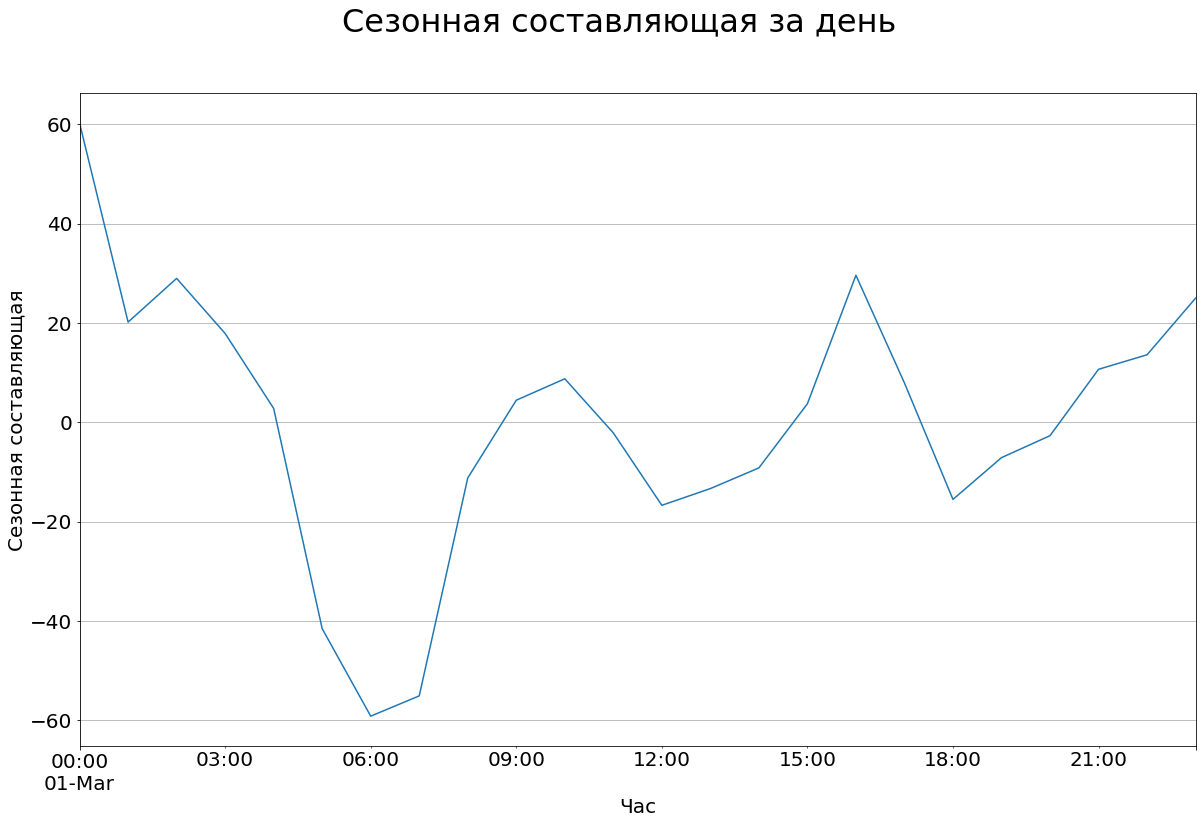

In [18]:
decomposed.seasonal['2018-03-1'].plot(ax=plt.gca(),
                                      figsize=(20,12),
                                      grid=True,
                                      fontsize=20)


plt.suptitle('Сезонная составляющая за день', fontsize=32)
plt.xlabel('Час', fontsize=20)
plt.ylabel('Сезонная составляющая', fontsize=20);

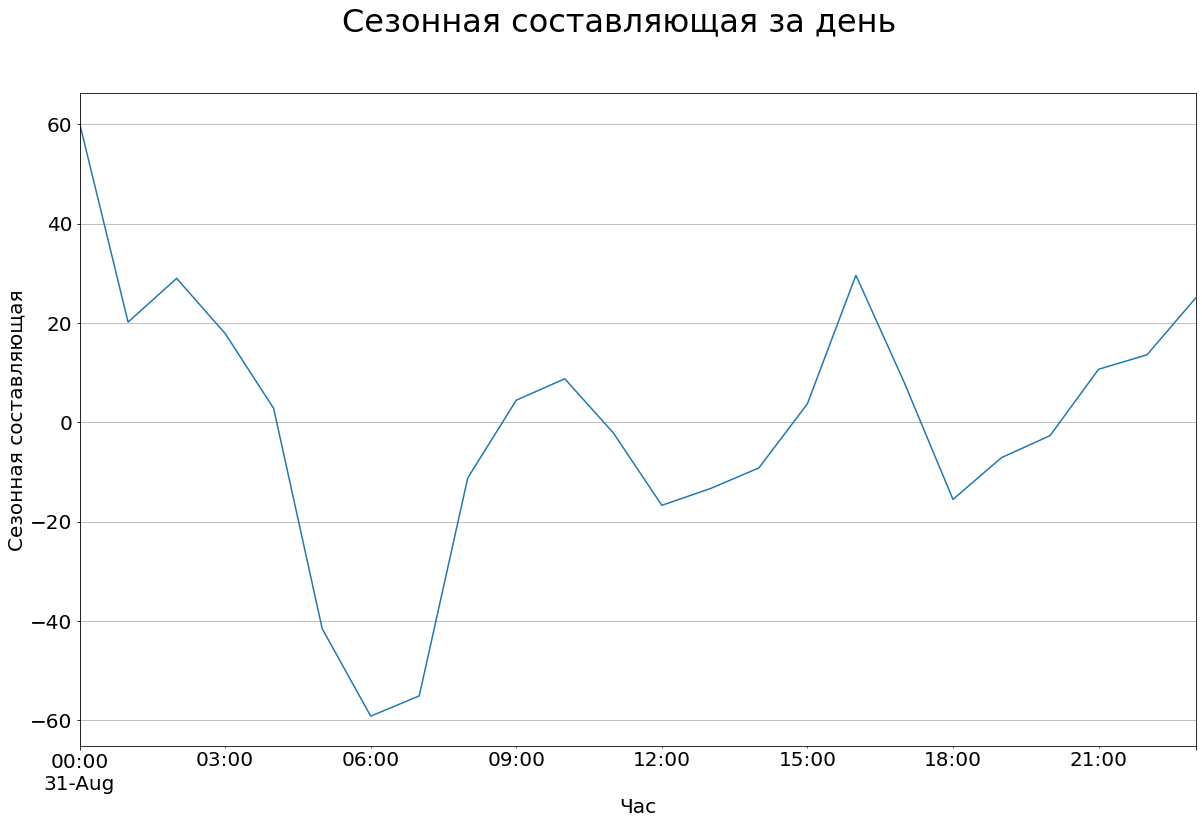

In [19]:
decomposed.seasonal['2018-08-31'].plot(ax=plt.gca(),
                                       figsize=(20,12),
                                       grid=True,
                                       fontsize=20)

plt.suptitle('Сезонная составляющая за день', fontsize=32)
plt.xlabel('Час', fontsize=20)
plt.ylabel('Сезонная составляющая', fontsize=20);

Есть сезонность в течение дня на заказ такси, самый высокий спрос в полночь, и снижается к минимальному спросу за день в 6 утра. Далее спрос увеличивается с просадкой в полдень и в 18 часов.

### Вывод:
Временной ряд имеет тренд на увеличение количества заказов такси и я явзяется нестационарным. По дням данные не имеют сезонности, а по часам в течение дня есть сезонность.

## Обучение

Выполним экспотенциальное сглаживание

In [20]:
def exponential_smoothing_numba(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series``
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [21]:
df.num_orders = exponential_smoothing_numba(df.num_orders, 0.3)

Сделаем временной ряд стационарными, вычислив разность временного ряда

In [22]:
df = df - df.shift()
df.dropna(inplace=True)

### Разделение на обучающую, валидационную и тестовую выборки

Выделим на тестовую выборку 10%.

In [23]:
test_size = round(.1 * df.shape[0])

In [24]:
test = df[-test_size:]

In [25]:
y_test = df.num_orders[-test_size:]

In [26]:
train_val = df[:-test_size]

In [27]:
train_val = train_val.reset_index()

In [28]:
train_val = train_val.rename(columns={'datetime': 'ds', 'num_orders': 'y'})

Выделим на валидацию 10%.

In [29]:
val_size = round(.1 * train_val.shape[0])

In [30]:
val = train_val[-val_size:]

In [31]:
train = train_val[:-val_size]

Проверим размер данных после разделения

In [32]:
df.shape[0] == train.shape[0] + val.shape[0] + test.shape[0]

True

### Prophet

Используем модель Prophet для прогноза временного ряда.

In [33]:
model = Prophet()
model.fit(train);

19:42:45 - cmdstanpy - INFO - Chain [1] start processing
19:42:46 - cmdstanpy - INFO - Chain [1] done processing


Получим резульнаты предсказания модели Prophet

In [34]:
future_train = model.make_future_dataframe(periods=val_size, freq='h')

In [35]:
forecast = model.predict(future_train)

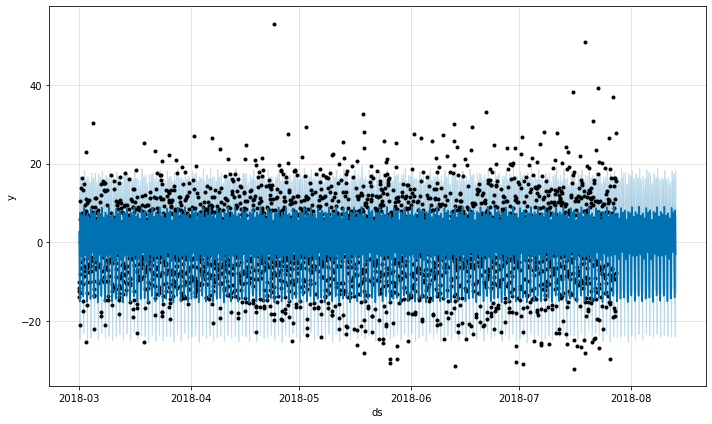

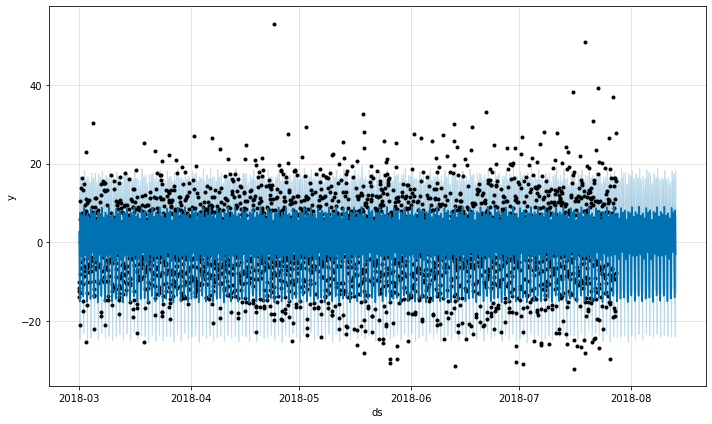

In [36]:
model.plot(forecast)

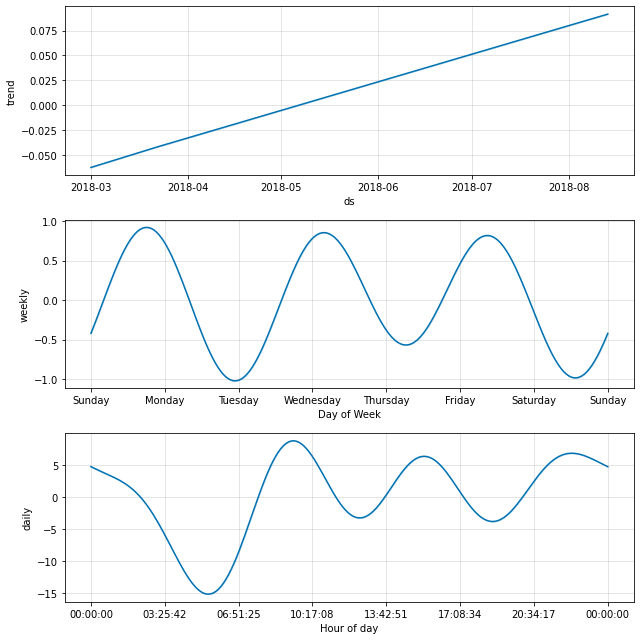

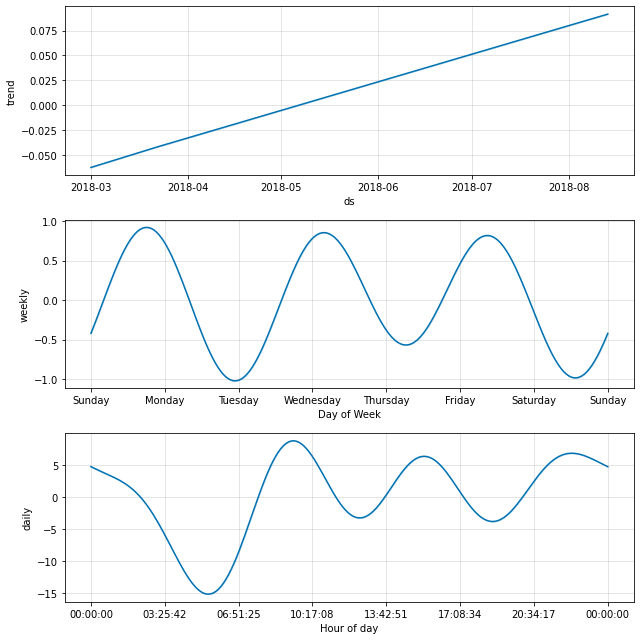

In [37]:
model.plot_components(forecast)

Используем столбцы `trend`, `daily` и `weekly` как признаки для обучения моделей.<br>
Prophet предсказывает значение `yhat`, складывая значения столбцов `trend`, `daily` и `weekly`. Можно было бы использовать только значение `yhat`, лучше используем 3 признака.

In [38]:
df_features = forecast[['ds', 'trend','daily', 'weekly']]

Добавим к новому набору данных наши данные о количестве заказов такси

In [39]:
df_features = df_features.assign(y=train_val.y)

Установим индекс таблицы равным столбцу datetime.

In [40]:
df_features.index = pd.to_datetime(df_features['ds'])

In [41]:
df_features = df_features.set_index('ds')

In [42]:
df_features.head()

,trend,daily,weekly,y
ds,,,,
2018-03-01 01:00:00,-0.062640,3.151106,-0.433186,-11.70000
2018-03-01 02:00:00,-0.062599,0.989169,-0.477949,-12.39000
2018-03-01 03:00:00,-0.062558,-3.329611,-0.514249,-10.17300
2018-03-01 04:00:00,-0.062518,-9.559938,-0.541609,-14.02110
2018-03-01 05:00:00,-0.062477,-14.484469,-0.559670,-20.91477


### Создание признаков

Создадим новые признаки: `Месяц`, `День`, `День недели` и `Час`

In [43]:
def make_harmonic_features(value, period=24):
    value *= 2 * np.pi / period
    return np.sin(value)

In [44]:
def make_features(data, max_lag, rolling_mean_size):
    data = data.copy()
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    data['hour'] = make_harmonic_features(data.hour)

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['y'].shift(lag)


    data['rolling_mean'] = data['y'].shift().rolling(rolling_mean_size).mean()
    return data

In [45]:
df_features = make_features(df_features, 24, 4)

In [46]:
df_features.head()

,trend,daily,weekly,y,month,day,dayofweek,hour,lag_1,lag_2,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
ds,,,,,,,,,,,,,,,,,,,,,
2018-03-01 01:00:00,-0.062640,3.151106,-0.433186,-11.70000,3,1,3,0.258819,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,-0.062599,0.989169,-0.477949,-12.39000,3,1,3,0.500000,-11.7000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,-0.062558,-3.329611,-0.514249,-10.17300,3,1,3,0.707107,-12.3900,-11.700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,-0.062518,-9.559938,-0.541609,-14.02110,3,1,3,0.866025,-10.1730,-12.390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 05:00:00,-0.062477,-14.484469,-0.559670,-20.91477,3,1,3,0.965926,-14.0211,-10.173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.071025


Разделим наш новый набор данных на обучающую и валидационную выборки.

In [47]:
df_val = df_features[-val_size:]

In [48]:
df_train = df_features[:-val_size]

In [49]:
df_train = df_train.dropna()

In [50]:
X_train = df_train.drop('y', axis=1)
y_train = df_train.y

In [51]:
X_val = df_val.drop('y', axis=1)
y_val = df_val.y

### Модели:

#### CatBoostRegressor

Создадим модель CatBoostRegressor и обучим ее

In [52]:
max_depth = [4,5]
n_estimators = [200,300]
learning_rate = [.01, .02, .03]

In [53]:
best_md = 0
best_ne = 0
rmse_best = np.inf

start = time.time()

for md in max_depth:
    for ne in n_estimators:
         for lr in learning_rate:
            model_cbr = CatBoostRegressor(verbose=False,
                                          max_depth=md,
                                          n_estimators=ne,
                                          learning_rate = lr)
            model_cbr.fit(X_train, y_train)
            y_pred_cbr = model_cbr.predict(X_val)
            rmse = mean_squared_error(y_val, y_pred_cbr)**.5
            print('n_estimators - ' + str(md))
            print('max_depth - ' + str(ne))
            print('learning_rate - ' + str(lr))
            print('RMSE - ' + str(round(rmse, 2)))
            print('-------------------------------------------------------')
            if rmse < rmse_best:
                rmse_best = rmse
                best_md = md
                best_ne = ne
                best_lr = lr
                best_model_cbr = model_cbr
                best_pred = y_pred_cbr

delta = time.time() - start

print('-------------------------------------------------------')
print('Время выполнения - ' + str(round(delta)) + ' сек')
print('Лучшее значение параметра n_estimators - ' + str(best_md))
print('Лучшее значение параметра max_depth - ' + str(best_ne))
print('Лучшее значение RMSE - ' + str(round(rmse_best, 2)))


n_estimators - 4
max_depth - 200
learning_rate - 0.01
RMSE - 10.66
-------------------------------------------------------
n_estimators - 4
max_depth - 200
learning_rate - 0.02
RMSE - 10.1
-------------------------------------------------------
n_estimators - 4
max_depth - 200
learning_rate - 0.03
RMSE - 9.91
-------------------------------------------------------
n_estimators - 4
max_depth - 300
learning_rate - 0.01
RMSE - 10.33
-------------------------------------------------------
n_estimators - 4
max_depth - 300
learning_rate - 0.02
RMSE - 9.89
-------------------------------------------------------
n_estimators - 4
max_depth - 300
learning_rate - 0.03
RMSE - 9.65
-------------------------------------------------------
n_estimators - 5
max_depth - 200
learning_rate - 0.01
RMSE - 10.57
-------------------------------------------------------
n_estimators - 5
max_depth - 200
learning_rate - 0.02
RMSE - 10.01
-------------------------------------------------------
n_estimators - 5
max

#### LinearRegression

Создадим модель LinearRegression и обучим ее

In [54]:
model_lr = LinearRegression()

In [55]:
model_lr.fit(X_train, y_train);

In [56]:
y_pred_lr = model_lr.predict(X_val)

In [57]:
print("RMSE валидационой выборки модели LinearRegression:",
      round(mean_squared_error(y_val, y_pred_lr)**.5, 2))

RMSE валидационой выборки модели LinearRegression: 10.04


#### RandomForestRegressor

Создадим модель RandomForestRegressor и обучим ее

In [58]:
max_depth = [9,10]
n_estimators = [100,200]

In [59]:
best_md = 0
best_ne = 0
rmse_best = np.inf

start = time.time()

for md in max_depth:
    for ne in n_estimators:
        model_rfr = RandomForestRegressor(n_estimators=100,
                                          max_depth=6,
                                          random_state=42)
        model_rfr.fit(X_train, y_train);
        y_pred_rfr = model_rfr.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred_rfr)**.5
        print('n_estimators - ' + str(md))
        print('max_depth - ' + str(ne))
        print('RMSE - ' + str(round(rmse, 2)))
        print('-------------------------------------------------------')
        if rmse < rmse_best:
            rmse_best = rmse
            best_md = md
            best_ne = ne
            best_model_rfr = model_rfr

delta = time.time() - start

print('-------------------------------------------------------')
print('Время выполнения - ' + str(round(delta)) + ' сек')
print('Лучшее значение параметра n_estimators - ' + str(best_md))
print('Лучшее значение параметра max_depth - ' + str(best_ne))
print('Лучшее значение RMSE - ' + str(round(rmse_best, 2)))


n_estimators - 9
max_depth - 100
RMSE - 9.81
-------------------------------------------------------
n_estimators - 9
max_depth - 200
RMSE - 9.81
-------------------------------------------------------
n_estimators - 10
max_depth - 100
RMSE - 9.81
-------------------------------------------------------
n_estimators - 10
max_depth - 200
RMSE - 9.81
-------------------------------------------------------
-------------------------------------------------------
Время выполнения - 13 сек
Лучшее значение параметра n_estimators - 9
Лучшее значение параметра max_depth - 100
Лучшее значение RMSE - 9.81


### Вывод:
Обучили три модели и провели оценку качества на валидационой выборке метрикой RMSE:
1. `CatBoostRegressor - 9.38`;
2. LinearRegression - 10.81;
3. RandomForestRegressor - 9.46.

Выбрана лучшая модель `CatBoostRegressor`.

## Тестирование

Проведем тестирование лучшей модели.

In [60]:
future_test = model.make_future_dataframe(periods=val_size+test_size, freq='h')

In [61]:
forecast = model.predict(future_test)

In [62]:
df_test = forecast[-test_size:][['ds', 'trend','daily', 'weekly']]

In [63]:
df_test.index = pd.to_datetime(df_test['ds'])

df_test = df_test.set_index('ds')

In [64]:
df_test

,trend,daily,weekly
ds,,,
2018-08-13 14:00:00,0.091679,1.732382,-0.606005
2018-08-13 15:00:00,0.091718,5.763490,-0.689660
2018-08-13 16:00:00,0.091756,5.626171,-0.765674
2018-08-13 17:00:00,0.091795,1.479575,-0.833150
2018-08-13 18:00:00,0.091833,-2.841447,-0.891295
...,...,...,...
2018-08-31 19:00:00,0.108546,-3.546904,0.326686
2018-08-31 20:00:00,0.108585,-0.226816,0.236559
2018-08-31 21:00:00,0.108624,4.229677,0.142454


In [65]:
df_test = df_test.assign(y=test.num_orders)

In [66]:
df_test = make_features(df_test, 24, 4)

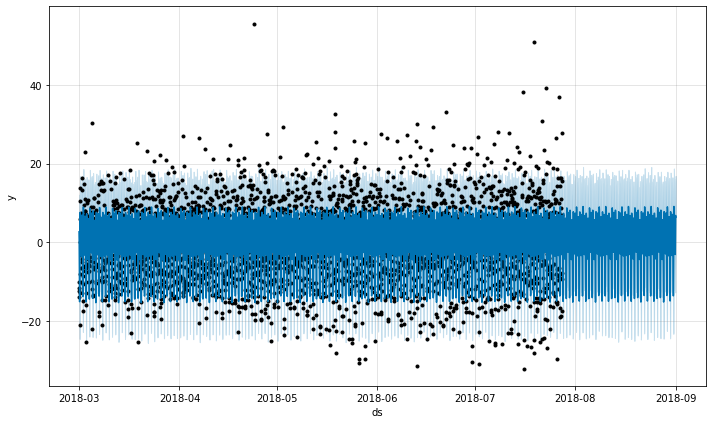

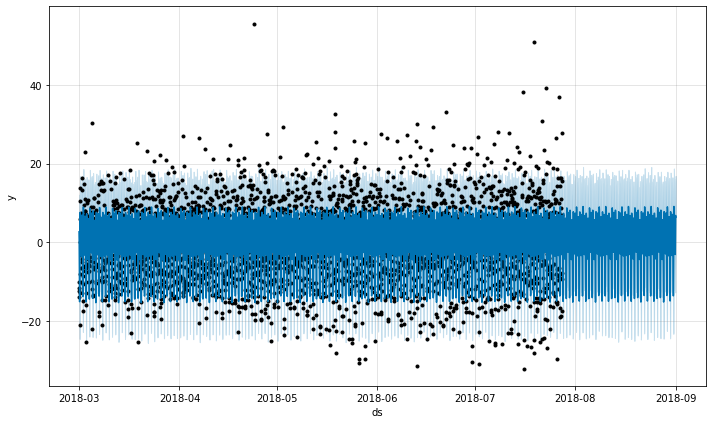

In [67]:
model.plot(forecast)

In [68]:
y_pred_cbr = best_model_cbr.predict(df_test)

In [69]:
print("RMSE на тестовой выборке:", round(mean_squared_error(y_test, y_pred_cbr)**.5, 2))

RMSE на тестовой выборке: 12.89


Посмотрим на важность переменных

In [70]:
fi = pd.DataFrame(model_cbr.feature_importances_,
                  index=X_val.columns,
                  columns=['fi'])

In [71]:
fi.sort_values(by='fi', ascending=False)

,fi
daily,31.877130
lag_24,13.506932
hour,9.245303
rolling_mean,5.805315
weekly,4.956770
lag_6,3.566790
lag_1,2.534807
lag_2,2.140140
lag_23,2.040602
lag_8,1.869036


Сгенерированные нами признаки моделью Prophet `daily` и `trend`, а также `hour` оказывают наибольшее влияние на обучение модели.

Построим график предсказанного значения и реальных тестовых значений

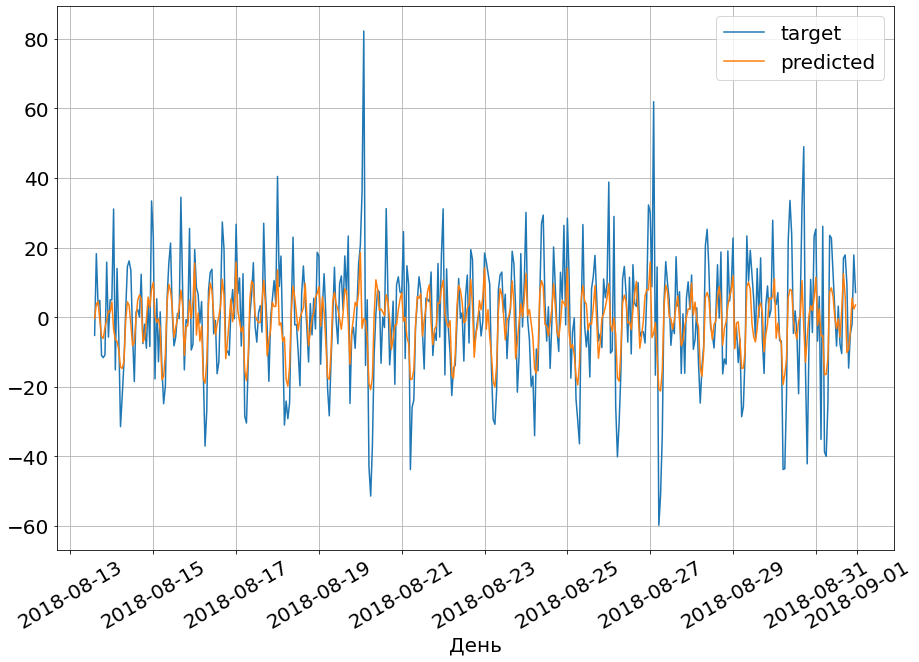

In [72]:
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 20})
plt.grid()
plt.xlabel('День')
plt.xticks(rotation=30)
plt.plot(y_test.index.tolist(),  y_test.tolist(), label = "target")
plt.plot(y_test.index.tolist(), y_pred_cbr.tolist(), label = "predicted")
plt.legend(fontsize=20)
plt.show()

## Вывод:

Загрузите данные и выполните их ресемплирование по одному часу.
Проанализируйте данные.
Обучите разные модели с различными гиперпараметрами. Сделайте тестовую выборку размером 10% от исходных данных.
Проверьте данные на тестовой выборке и сделайте выводы.

1. Данные были загружены:
    <br>Набор данных содержит информацию о количестве заказов такси за пол года с 1 марта 2018 года по 31 августа 2018 года.
2. Проведен анализ данных
   <br>Временной ряд имеет тренд на увеличение количества заказов такси и я явзяется нестационарным. По дням данные не имеют сезонности, а по часам в течение дня есть сезонность.
3. Данные были подготовлены; 
4. Сгенерированы новые признаки;
5. Обучено три модели и выбрана лучшая CatBoostRegressor с лучшим значением RMSE на валидационой выборке;
6. Лучшая модель проверена на тестовой выборке размером 10% от исходных данных. 
    <br>Значение RMSE - 8.96.
7. Определены параметры оказывающее влияние на модель

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48